In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sqlalchemy import create_engine, Column, Integer, Float, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

heart_data = pd.read_csv('heart_disease_uci.csv')
engine = create_engine('sqlite:///heart_disease.db')
heart_data.to_sql('heart_disease', engine, if_exists='replace', index=False)
query = "SELECT * FROM heart_disease"
df = pd.read_sql(query, engine)
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {df.columns.tolist()}")

Number of rows: 920
Number of columns: 16
Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [2]:
df.describe(include='all')

id         age   sex    dataset            cp    trestbps  \
count   920.000000  920.000000   920        920           920  861.000000   
unique         NaN         NaN     2          4             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   726        304           496         NaN   
mean    460.500000   53.510870   NaN        NaN           NaN  132.132404   
std     265.725422    9.424685   NaN        NaN           NaN   19.066070   
min       1.000000   28.000000   NaN        NaN           NaN    0.000000   
25%     230.750000   47.000000   NaN        NaN           NaN  120.000000   
50%     460.500000   54.000000   NaN        NaN           NaN  130.000000   
75%     690.250000   60.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol         fbs restecg      thalch       exang     oldpeak  \
count   890.000000  830.000000     918  865.000000  865.000000  858.000000   
unique         NaN         NaN       3         NaN         NaN         NaN   
top            NaN         NaN  normal         NaN         NaN         NaN   
freq           NaN         NaN     551         NaN         NaN         NaN   
mean    199.130337    0.166265     NaN  137.545665    0.389595    0.878788   
std     110.780810    0.372543     NaN   25.926276    0.487941    1.091226   
min       0.000000    0.000000     NaN   60.000000    0.000000   -2.600000   
25%     175.000000    0.000000     NaN  120.000000    0.000000    0.000000   
50%     223.000000    0.000000     NaN  140.000000    0.000000    0.500000   
75%     268.000000    0.000000     NaN  157.000000    1.000000    1.500000   
max     603.000000    1.000000     NaN  202.000000    1.000000    6.200000   

       slope          ca    thal         num  
count    611  309.000000     434  920.000000  
unique     3         NaN       3         NaN  
top     flat         NaN  normal         NaN  
freq     345         NaN     196         NaN  
mean     NaN    0.676375     NaN    0.995652  
std      NaN    0.935653     NaN    1.142693  
min      NaN    0.000000     NaN    0.000000  
25%      NaN    0.000000     NaN    0.000000  
50%      NaN    0.000000     NaN    1.000000  
75%      NaN    1.000000     NaN    2.000000  
max      NaN    3.000000     NaN    4.000000

In [3]:
df.head(5)

id  age     sex    dataset               cp  trestbps   chol  fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0  1.0   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  0.0   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  0.0   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  0.0   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  0.0   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0    0.0      2.3  downsloping  0.0   
1  lv hypertrophy   108.0    1.0      1.5         flat  3.0   
2  lv hypertrophy   129.0    1.0      2.6         flat  2.0   
3          normal   187.0    0.0      3.5  downsloping  0.0   
4  lv hypertrophy   172.0    0.0      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    float64
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    float64
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 115.1+ KB


## Handling Missing values

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'num'],
      dtype='object')

In [7]:
categorical_cols

Index(['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [8]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [9]:
df[numeric_cols].isnull().sum()

id          0
age         0
trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64

In [10]:
for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df[categorical_cols].isnull().sum()

sex        0
dataset    0
cp         0
restecg    0
slope      0
thal       0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Handling outliers

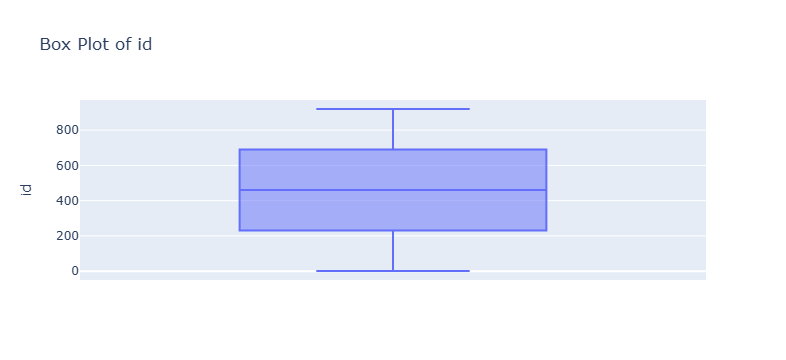

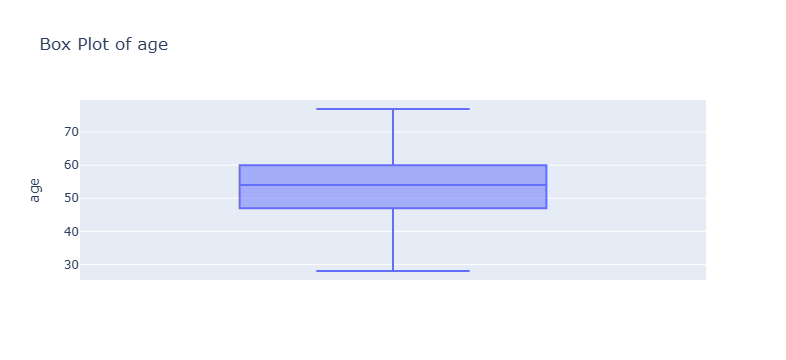

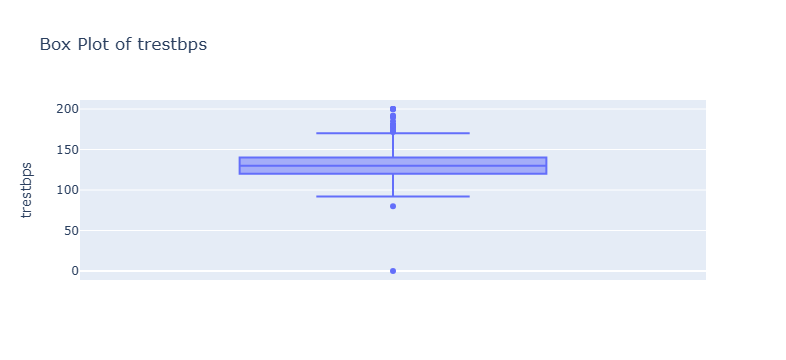

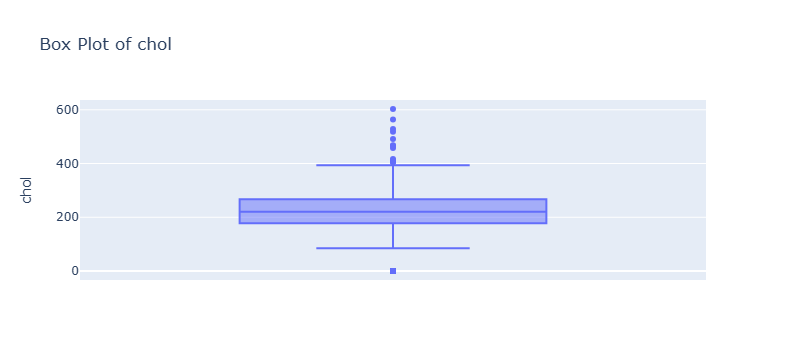

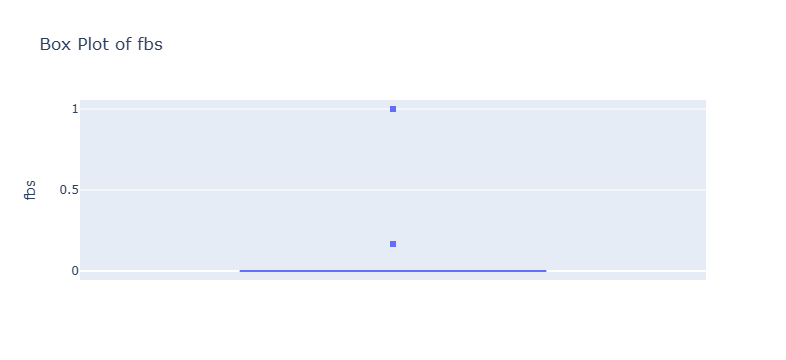

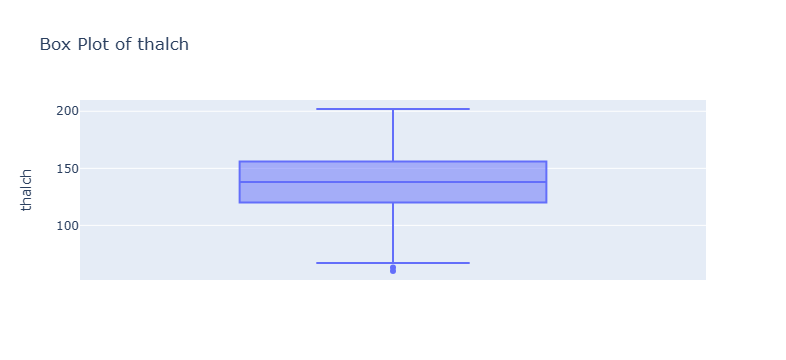

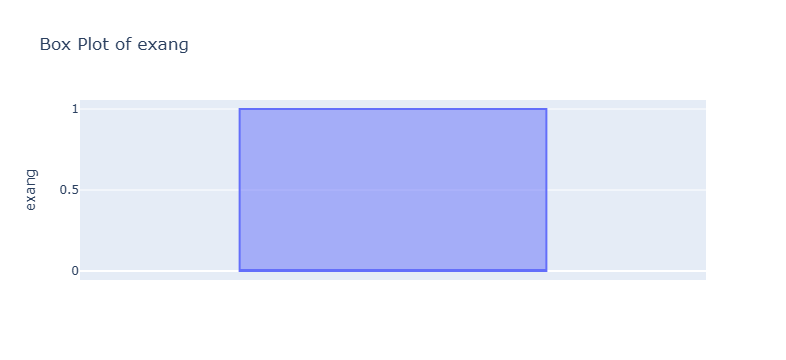

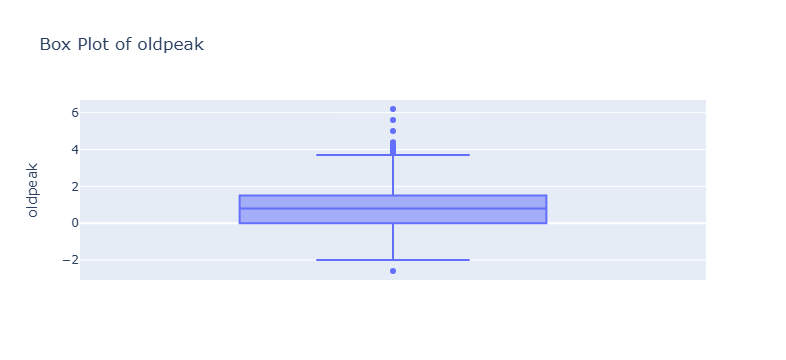

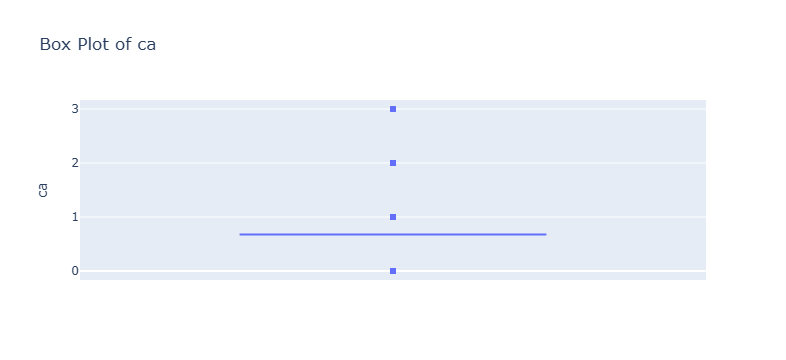

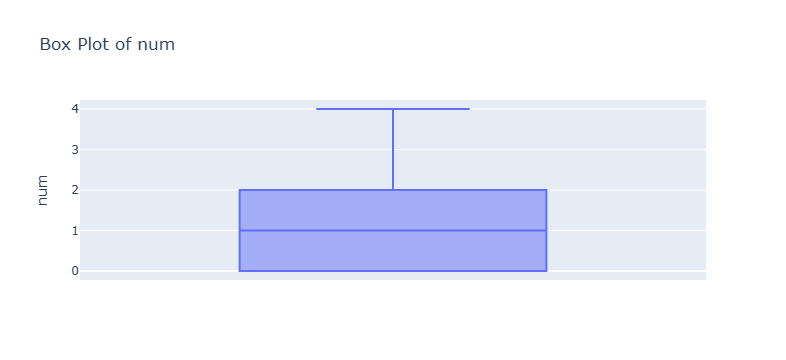

In [13]:
for col in numeric_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}')
    fig.show()

In [14]:
df= df[((df['trestbps'] >= 92) & (df['trestbps'] <= 170))]

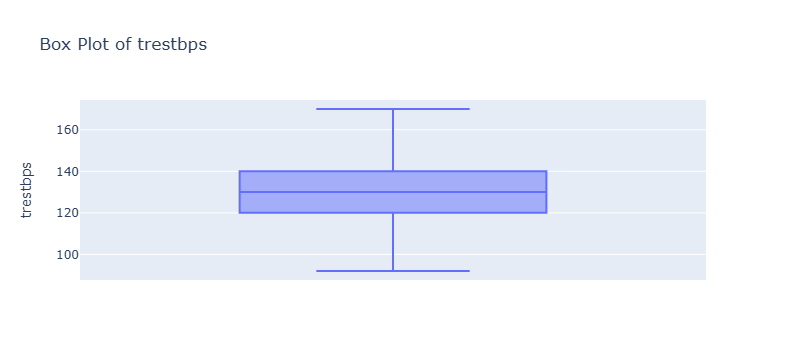

In [15]:
fig = px.box(df, y='trestbps', title='Box Plot of trestbps')
fig.show()

In [16]:
df= df[((df['chol'] >= 117) & (df['chol'] <= 369))]

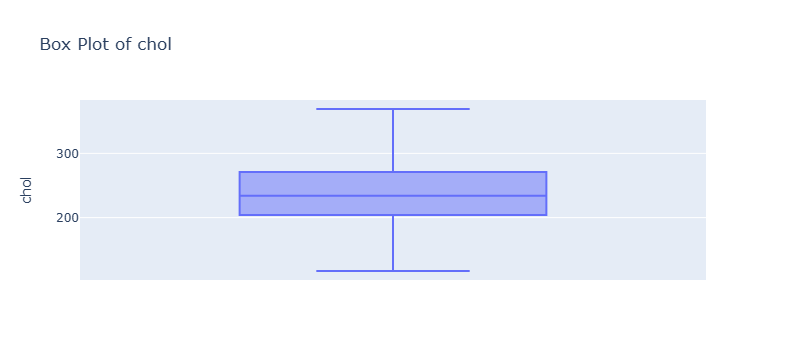

In [17]:
fig = px.box(df, y='chol', title='Box Plot of chol')
fig.show()

In [18]:
df= df[((df['thalch'] >= 80) )]

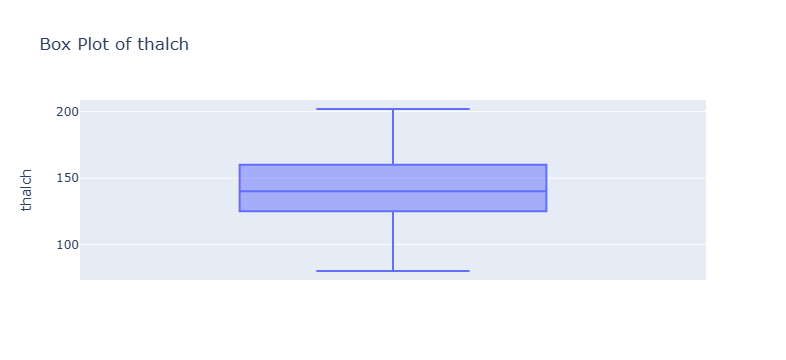

In [19]:
fig = px.box(df, y='thalch', title='Box Plot of thalch')
fig.show()

In [20]:
df= df[((df['oldpeak'] >= -2) & (df['oldpeak'] <= 3.7))]

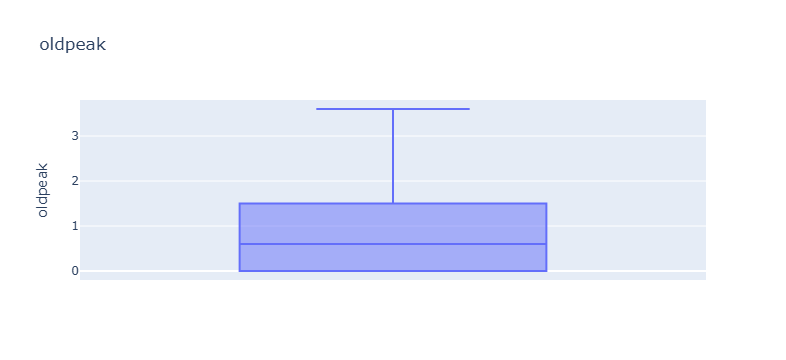

In [21]:
fig = px.box(df, y='oldpeak', title='oldpeak')
fig.show()

In [22]:
df.describe()

id         age    trestbps        chol         fbs      thalch  \
count  693.000000  693.000000  693.000000  693.000000  693.000000  693.000000   
mean   405.046176   52.665224  131.090849  239.265194    0.160650  141.438686   
std    267.263278    9.545626   15.276166   46.468669    0.365286   23.912584   
min      1.000000   28.000000   92.000000  117.000000    0.000000   80.000000   
25%    186.000000   46.000000  120.000000  204.000000    0.000000  125.000000   
50%    369.000000   54.000000  130.000000  234.000000    0.000000  140.000000   
75%    556.000000   59.000000  140.000000  271.000000    0.000000  160.000000   
max    920.000000   77.000000  170.000000  369.000000    1.000000  202.000000   

            exang     oldpeak          ca         num  
count  693.000000  693.000000  693.000000  693.000000  
mean     0.358070    0.818072    0.660414    0.787879  
std      0.463753    0.944767    0.575554    1.064277  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.676375    0.000000  
50%      0.000000    0.600000    0.676375    0.000000  
75%      1.000000    1.500000    0.676375    1.000000  
max      1.000000    3.600000    3.000000    4.000000

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])  # numeric_cols: list of numerical column names
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

In [24]:
df.duplicated().sum()

0

## analyze schema

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        693 non-null    int64  
 1   age       693 non-null    int64  
 2   sex       693 non-null    object 
 3   dataset   693 non-null    object 
 4   cp        693 non-null    object 
 5   trestbps  693 non-null    float64
 6   chol      693 non-null    float64
 7   fbs       693 non-null    float64
 8   restecg   693 non-null    object 
 9   thalch    693 non-null    float64
 10  exang     693 non-null    float64
 11  oldpeak   693 non-null    float64
 12  slope     693 non-null    object 
 13  ca        693 non-null    float64
 14  thal      693 non-null    object 
 15  num       693 non-null    int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 92.0+ KB
None


In [26]:
df.describe()

id         age    trestbps        chol         fbs      thalch  \
count  693.000000  693.000000  693.000000  693.000000  693.000000  693.000000   
mean   405.046176   52.665224  131.090849  239.265194    0.160650  141.438686   
std    267.263278    9.545626   15.276166   46.468669    0.365286   23.912584   
min      1.000000   28.000000   92.000000  117.000000    0.000000   80.000000   
25%    186.000000   46.000000  120.000000  204.000000    0.000000  125.000000   
50%    369.000000   54.000000  130.000000  234.000000    0.000000  140.000000   
75%    556.000000   59.000000  140.000000  271.000000    0.000000  160.000000   
max    920.000000   77.000000  170.000000  369.000000    1.000000  202.000000   

            exang     oldpeak          ca         num  
count  693.000000  693.000000  693.000000  693.000000  
mean     0.358070    0.818072    0.660414    0.787879  
std      0.463753    0.944767    0.575554    1.064277  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.676375    0.000000  
50%      0.000000    0.600000    0.676375    0.000000  
75%      1.000000    1.500000    0.676375    1.000000  
max      1.000000    3.600000    3.000000    4.000000

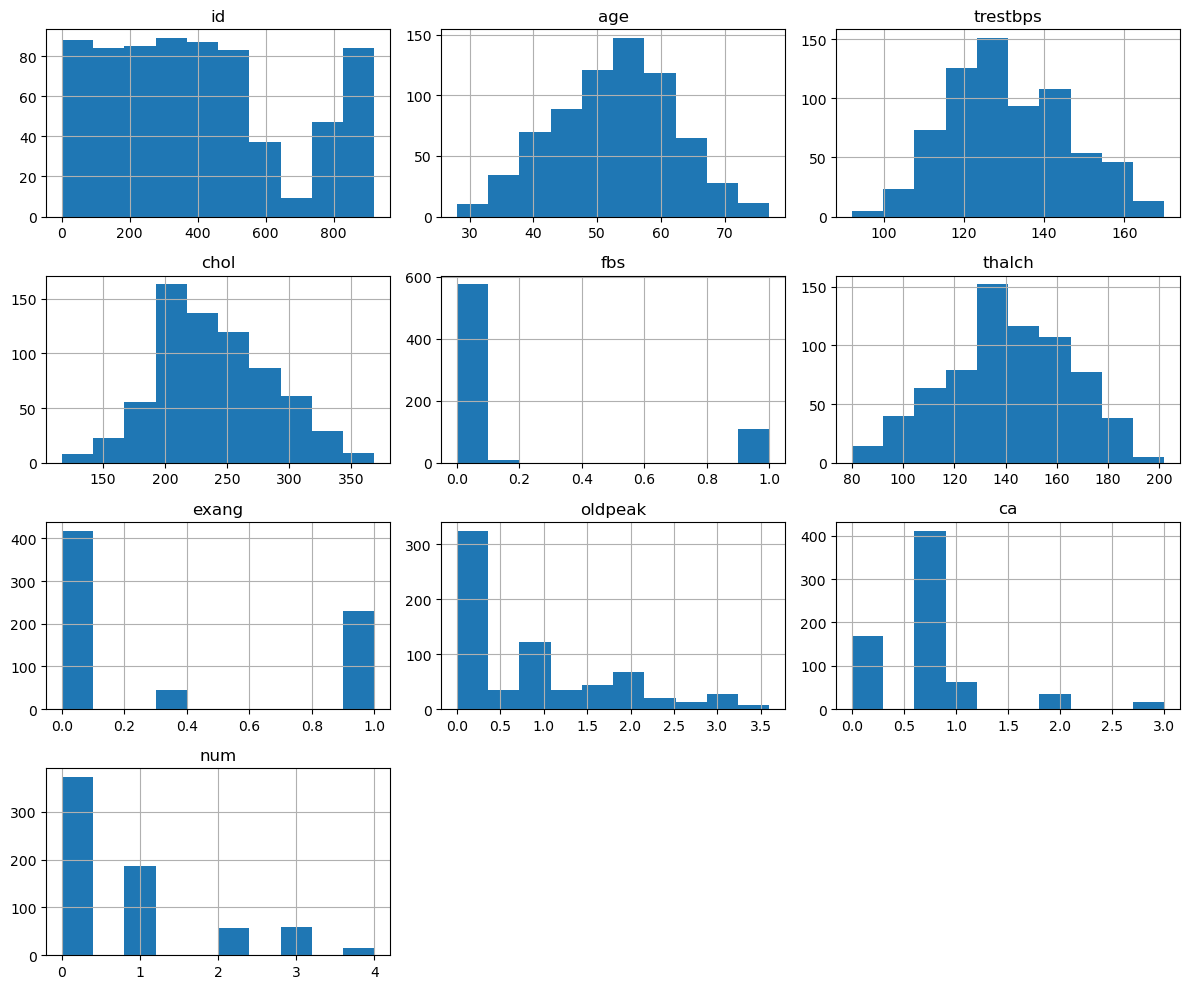

In [27]:
df[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

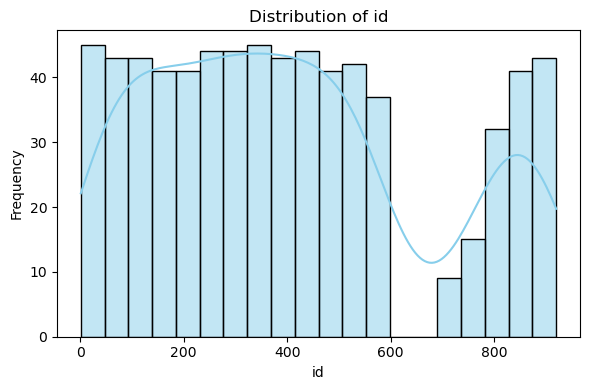

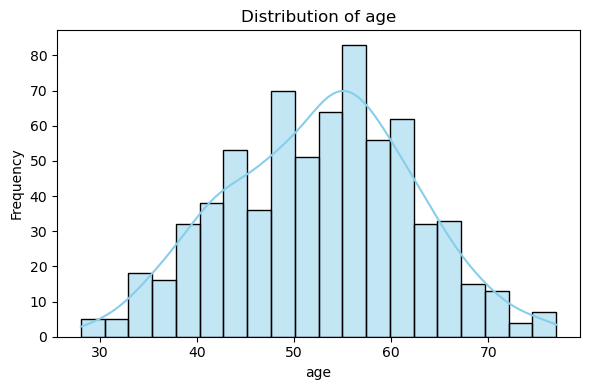

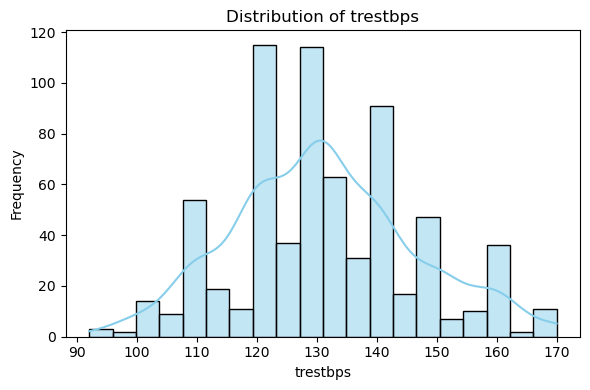

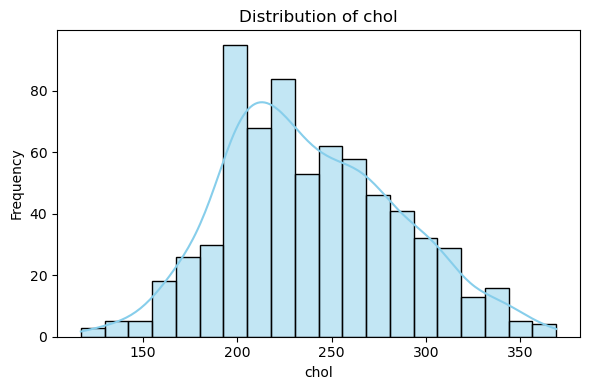

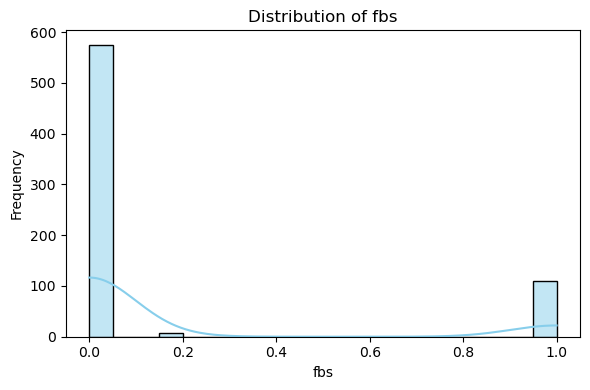

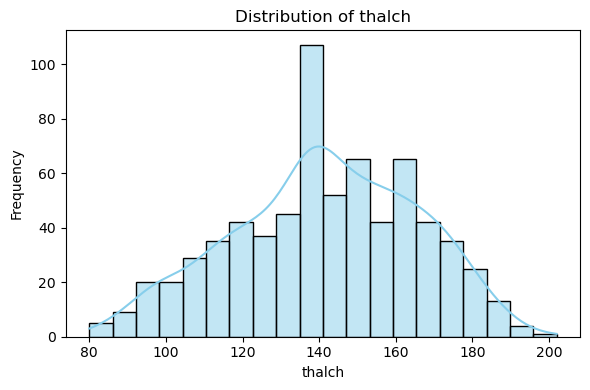

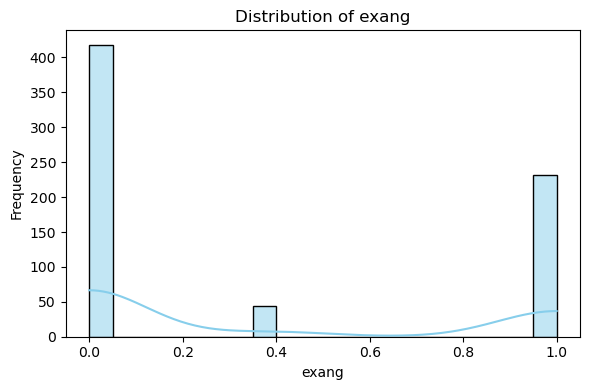

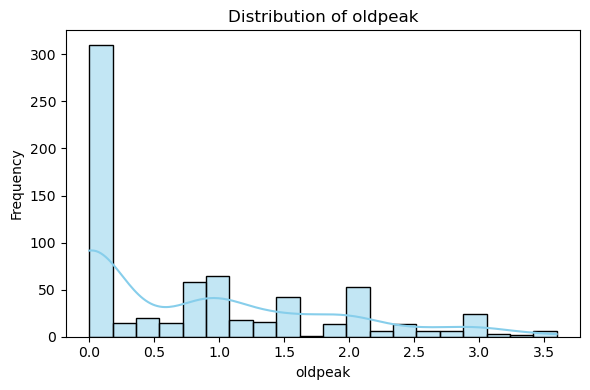

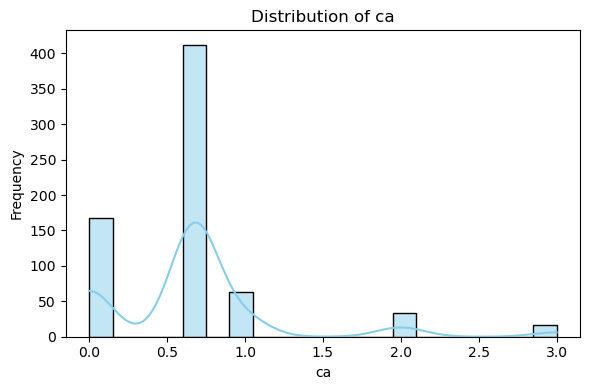

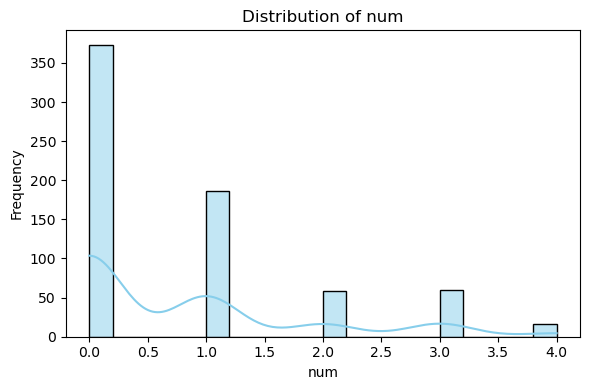

In [28]:
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

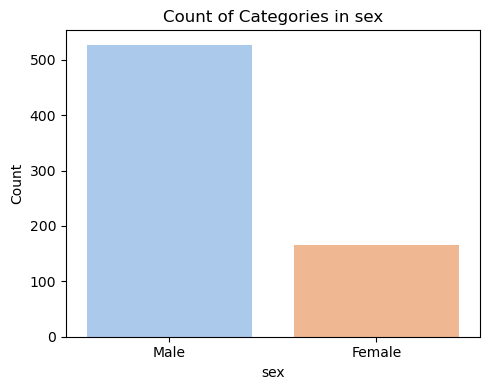

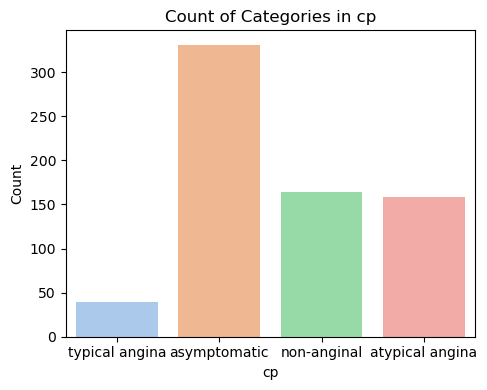

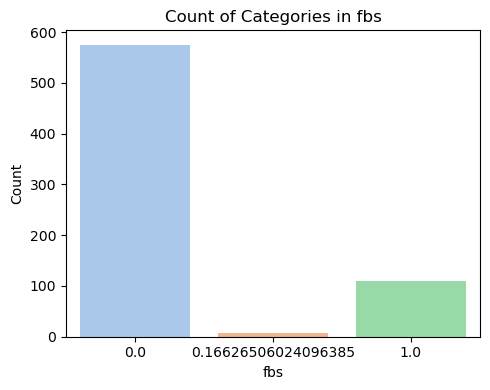

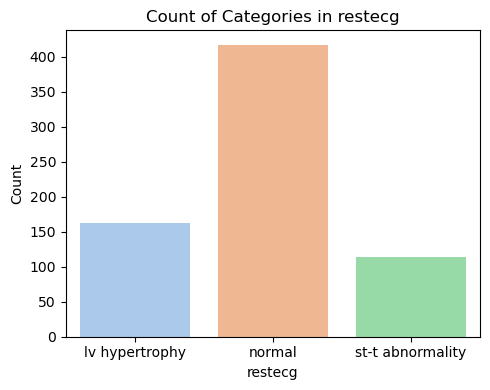

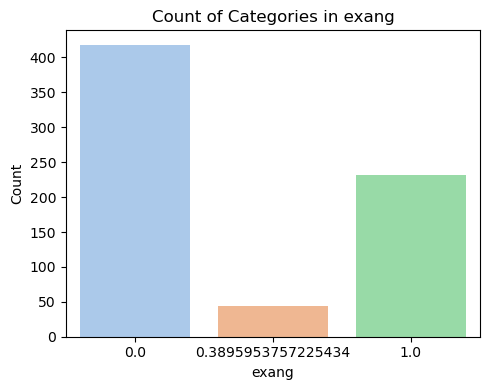

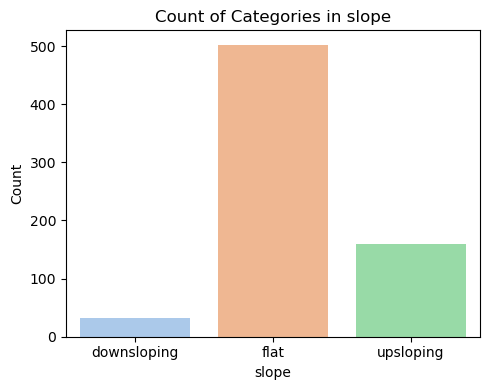

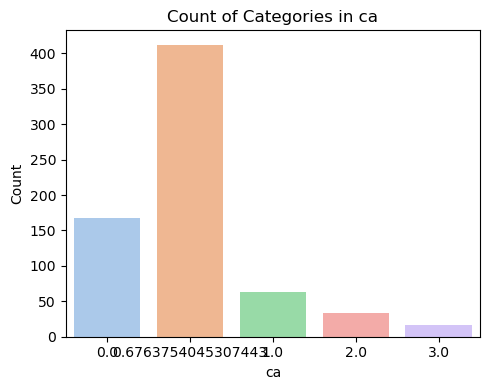

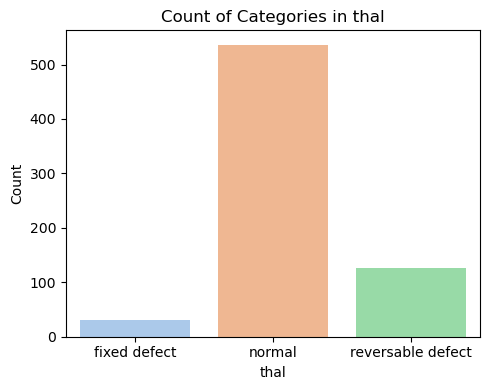

In [29]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

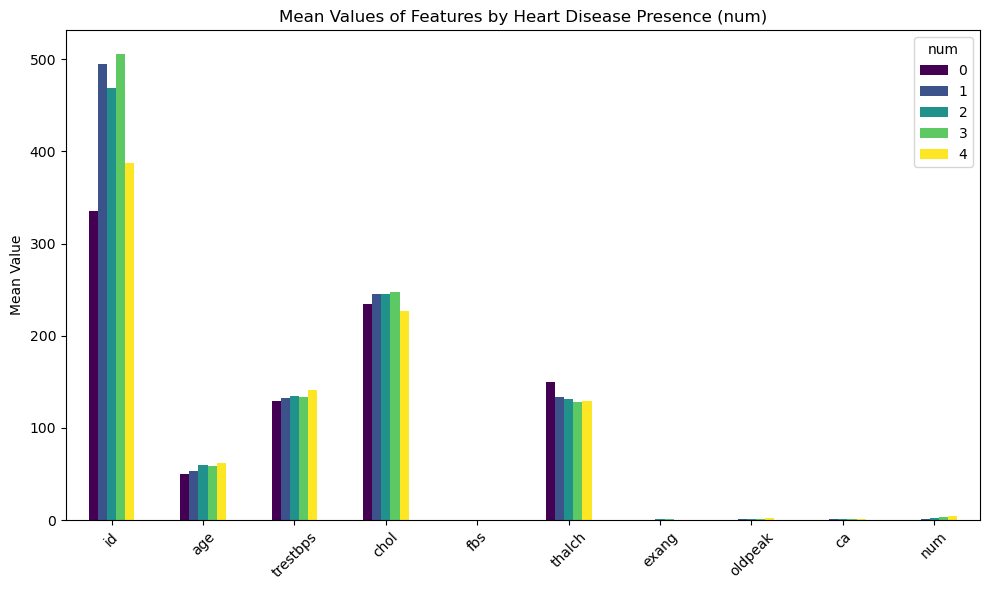

In [30]:
grouped = df.groupby('num')[df.select_dtypes(include=['int64', 'float64']).columns].mean().T
grouped.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Mean Values of Features by Heart Disease Presence (num)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

## 2. QA & visualizations

### Question 1: What is the distribution of heart disease cases in the dataset?

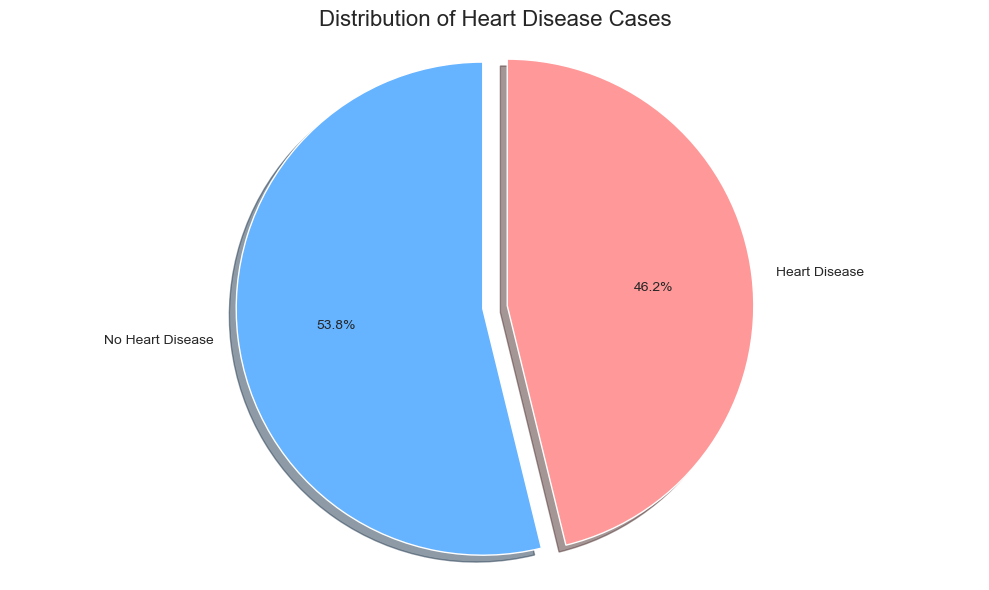

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create pie chart of heart disease distribution
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['num'].value_counts()
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # explode the 2nd slice (Heart Disease)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Heart Disease Cases', fontsize=16)
plt.tight_layout()
plt.savefig('heart_disease_distribution.png')
plt.show()

### Question 2: How does heart disease prevalence differ between males and females?

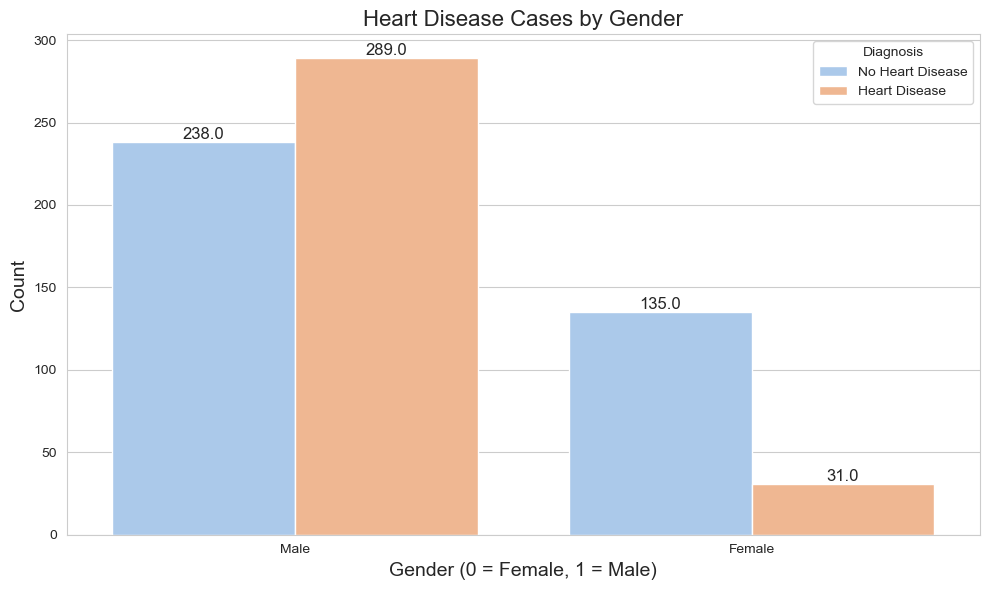

In [33]:
plt.figure(figsize=(10, 6))

# Create a count plot showing gender distribution by heart disease status
sns.countplot(x='sex', hue='num', data=df , palette='pastel')

# Add labels and title
plt.title('Heart Disease Cases by Gender', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(labels=['No Heart Disease', 'Heart Disease'], title='Diagnosis')

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'bottom', fontsize=12)

plt.tight_layout()
plt.savefig('gender_heart_disease.png')
plt.show()

### Question 3: How does age relate to heart disease?

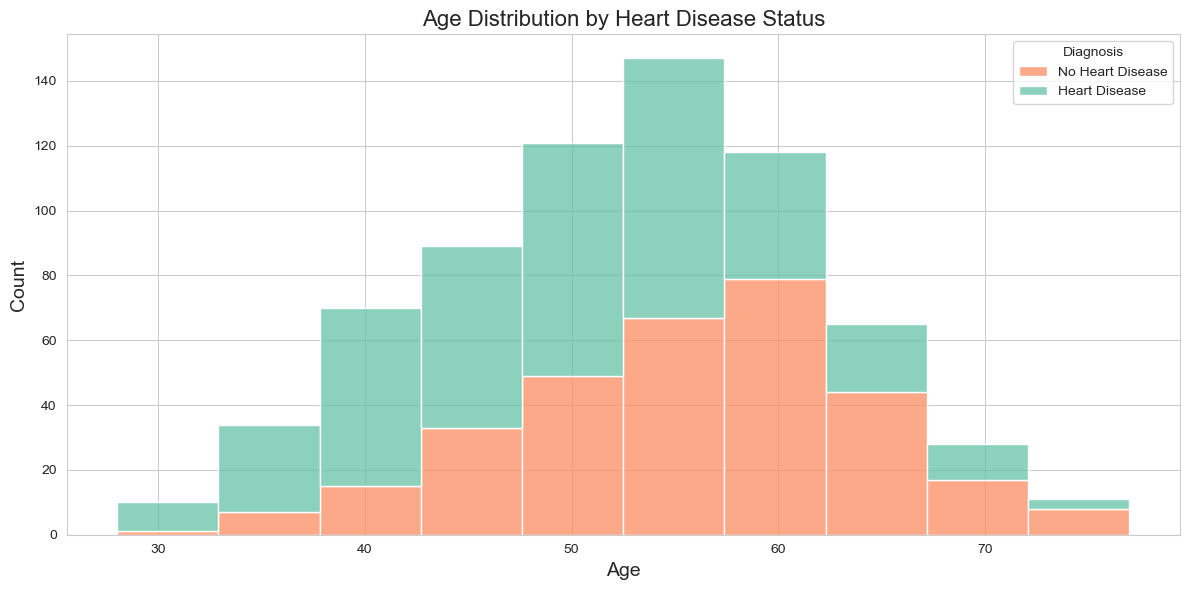

In [34]:
plt.figure(figsize=(12, 6))

# Create a histogram of age distribution colored by heart disease status
sns.histplot(data= df, x='age', hue='num', bins=10,
             multiple='stack', palette='Set2')

# Add labels and title
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(labels=['No Heart Disease', 'Heart Disease'], title='Diagnosis')

plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

### Question 4: How does maximum heart rate compare between patients with and without heart disease?


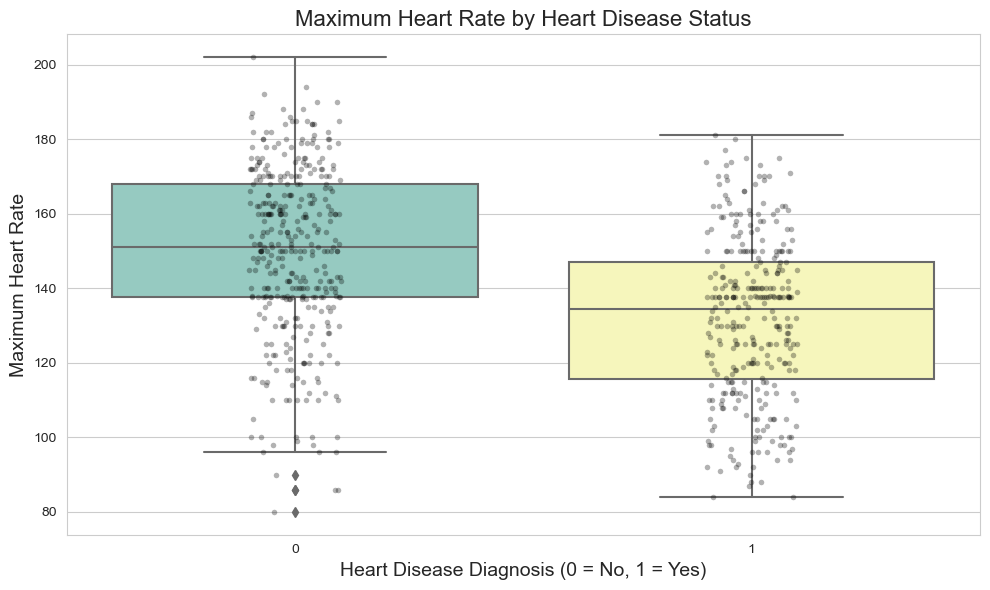

In [35]:
plt.figure(figsize=(10, 6))

# Create boxplots for maximum heart rate by heart disease status
sns.boxplot(x='num', y='thalch', data=df, palette='Set3')

# Add individual data points
sns.stripplot(x='num', y='thalch', data=df,
              color='black', alpha=0.3, size=4)

# Add labels and title
plt.title('Maximum Heart Rate by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Maximum Heart Rate', fontsize=14)

plt.tight_layout()
plt.savefig('max_heart_rate.png')
plt.show()

### Question 5: What is the relationship between cholesterol levels and heart disease?


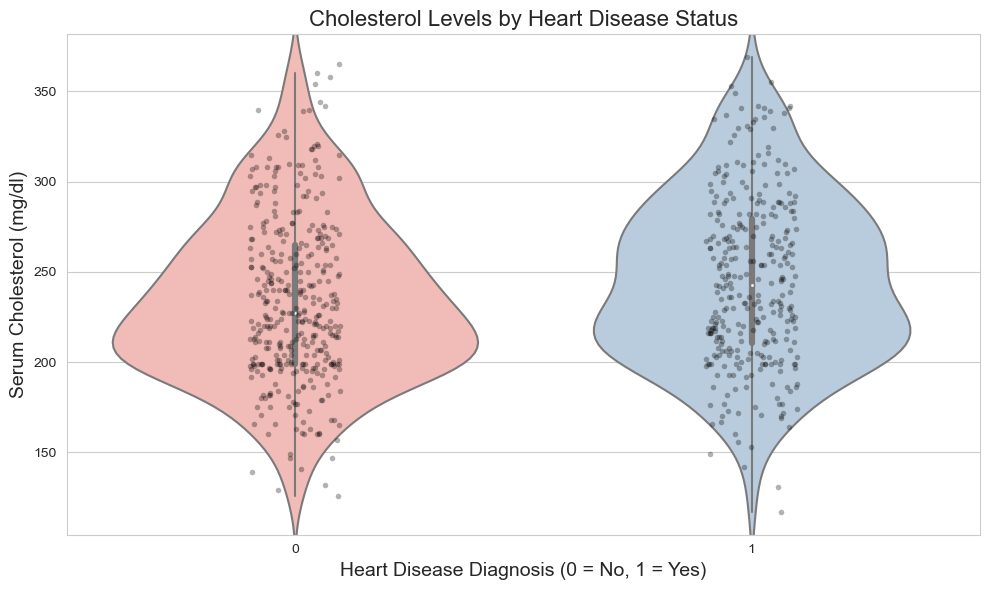

In [36]:
plt.figure(figsize=(10, 6))

# Create violin plots for cholesterol by heart disease status
sns.violinplot(x='num', y='chol', data=df, palette='Pastel1')

# Add individual data points
sns.stripplot(x='num', y='chol', data=df,
              color='black', alpha=0.3, size=4)

# Add labels and title
plt.title('Cholesterol Levels by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Diagnosis (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Serum Cholesterol (mg/dl)', fontsize=14)

plt.tight_layout()
plt.savefig('cholesterol_levels.png')
plt.show()

## 2.3 basic visuaization


Text(0.5, 1.0, 'Sex Distribution')

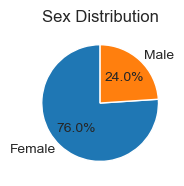

In [37]:
# 1. Sex Distribution
plt.subplot(2, 3, 2)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Age Distribution')

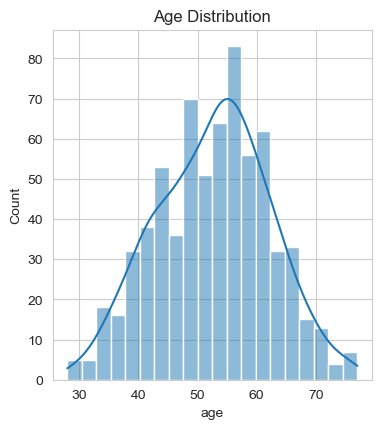

In [38]:
# 2. Age Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')

([<matplotlib.axis.XTick at 0x26369dbeb50>,
 [Text(0, 0, 'Typical Angina'),
  Text(1, 0, 'Atypical Angina'),
  Text(2, 0, 'Non-anginal Pain'),
  Text(3, 0, 'Asymptomatic')])

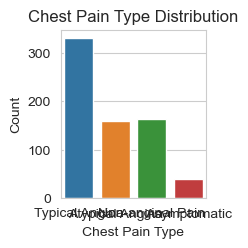

In [39]:
# 3. Chest Pain Type Distribution
plt.subplot(2, 3, 3)
cp_counts = df['cp'].value_counts().sort_index()
sns.barplot(x=cp_counts.index, y=cp_counts.values)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

Text(0.5, 0, 'Resting Blood Pressure (mm Hg)')

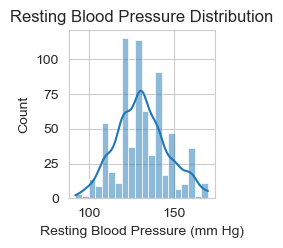

In [40]:
# 4. Resting Blood Pressure Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['trestbps'], kde=True, bins=20)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')

Text(0.5, 0, 'Serum Cholesterol (mg/dl)')

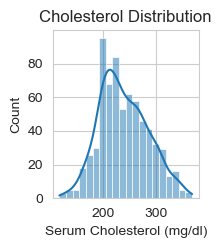

In [41]:
# 5. Cholesterol Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['chol'], kde=True, bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Serum Cholesterol (mg/dl)')

## 2.4 Advanced visualization


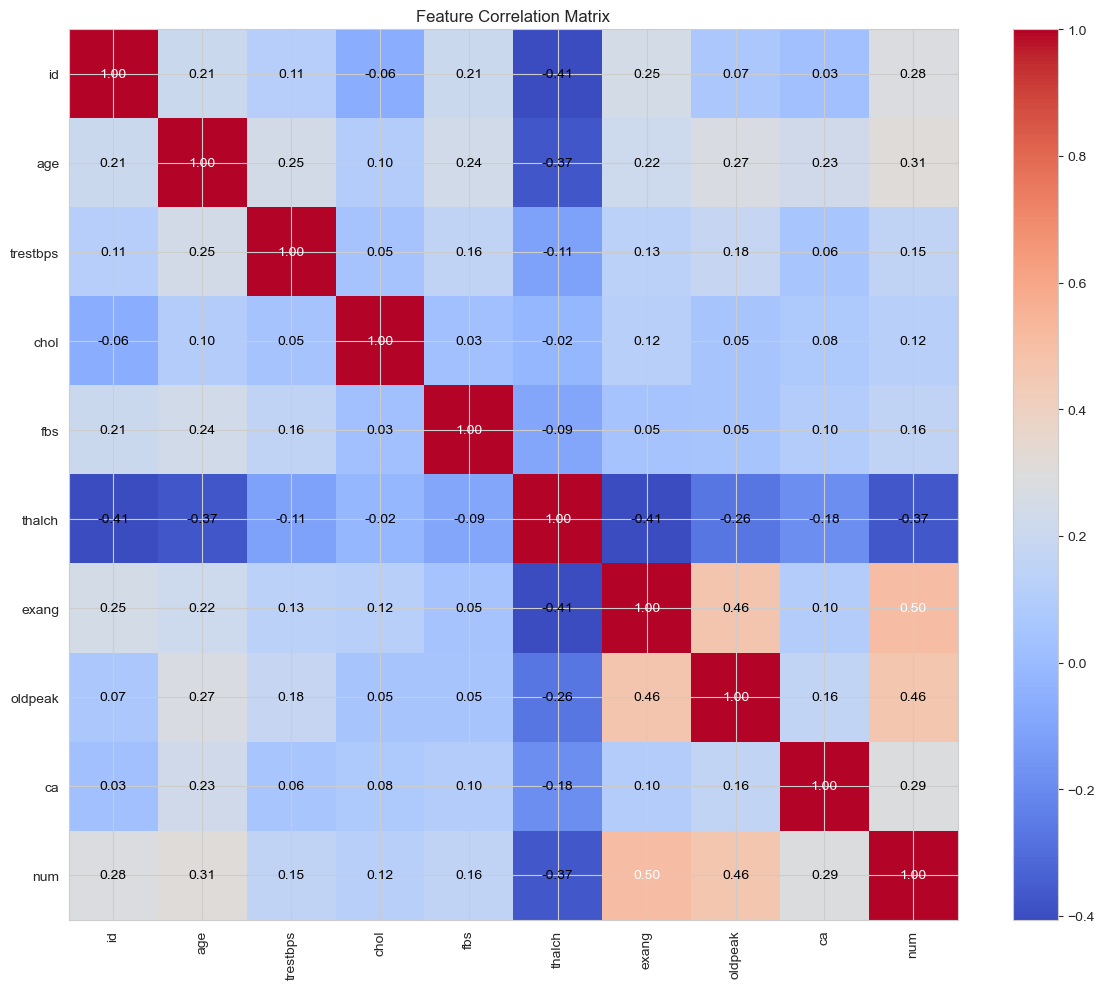

In [42]:
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(12, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

    # Add correlation values in the cells
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                     ha='center', va='center',
                     color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()

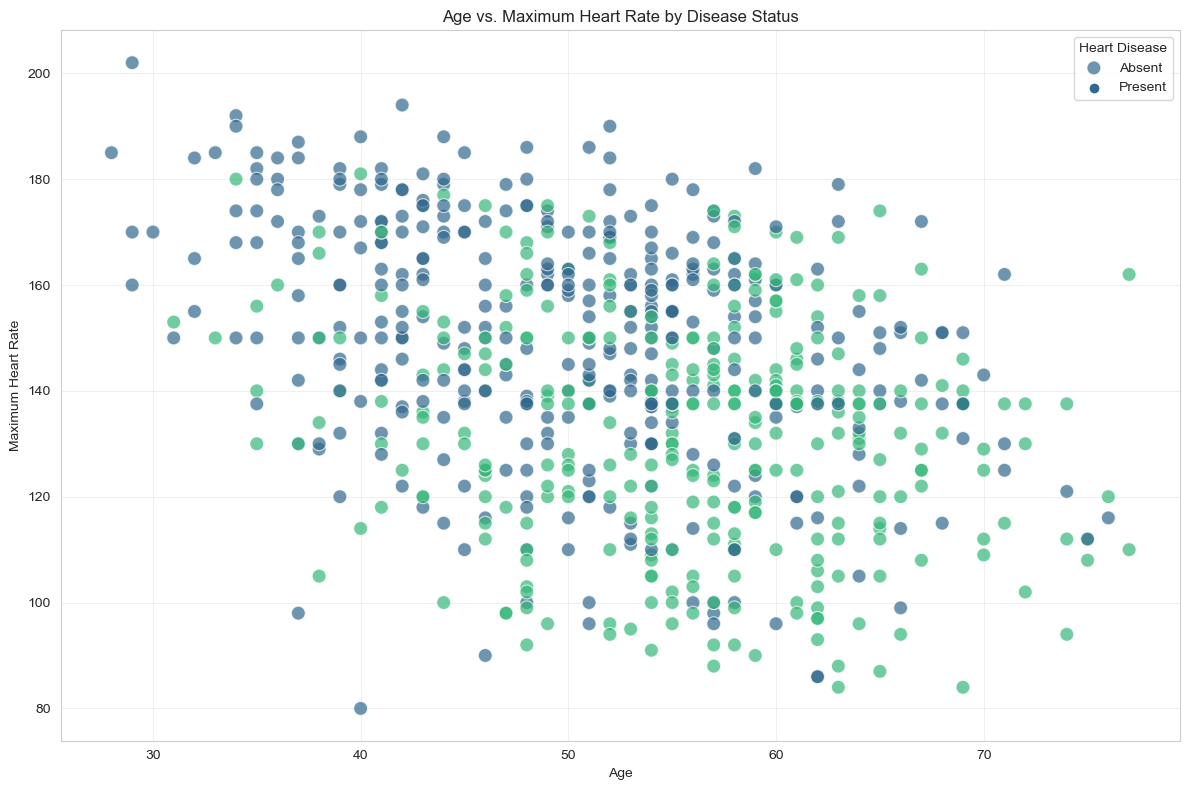

In [43]:
# 2. Age vs. Max Heart Rate Colored by Disease Status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalch', hue='num', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Age vs. Maximum Heart Rate by Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('age_vs_heartrate_scatter.png')

## 3.Modelling

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
)


# Apply Label Encoding to all object (string) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

print("\nFeature set shape:", X.shape)
print("Target set shape:", y.shape)


Feature set shape: (693, 15)
Target set shape: (693,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create a pipeline with scaling and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


Training set shape: (554, 15)
Testing set shape: (139, 15)


In [46]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [47]:
# Fit the model
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

In [48]:
# Performance metrics
print("\n===== BASELINE MODEL PERFORMANCE =====")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)




===== BASELINE MODEL PERFORMANCE =====

Confusion Matrix:
[[67  8]
 [13 51]]


In [49]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.close()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        75
           1       0.86      0.80      0.83        64

    accuracy                           0.85       139
   macro avg       0.85      0.85      0.85       139
weighted avg       0.85      0.85      0.85       139



In [50]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nSummary Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



Summary Metrics:
Accuracy: 0.8489
Precision: 0.8644
Recall: 0.7969
F1 Score: 0.8293
ROC AUC: 0.8902


## 3.2 Model Expirmntation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

In [52]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8058

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        75
           1       0.78      0.81      0.79        64

    accuracy                           0.81       139
   macro avg       0.80      0.81      0.81       139
weighted avg       0.81      0.81      0.81       139



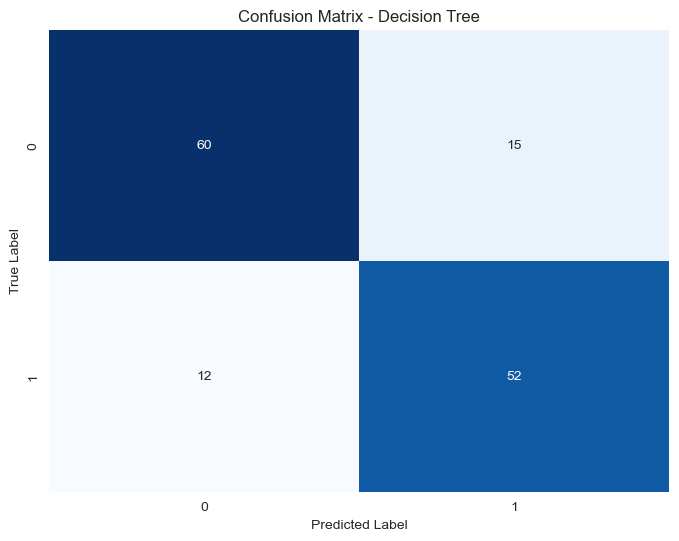

In [53]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [55]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8777

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        75
           1       0.87      0.86      0.87        64

    accuracy                           0.88       139
   macro avg       0.88      0.88      0.88       139
weighted avg       0.88      0.88      0.88       139



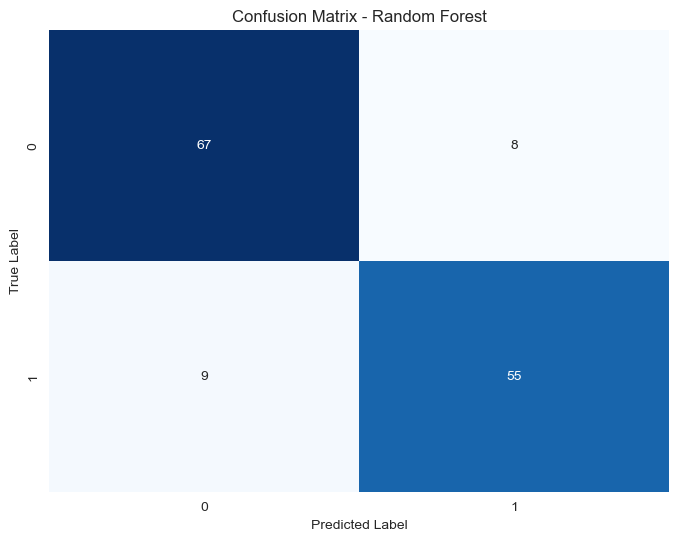

In [56]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the model with default parameters (but make sure to enable probability estimation)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

In [58]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.7842

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        75
           1       0.78      0.73      0.76        64

    accuracy                           0.78       139
   macro avg       0.78      0.78      0.78       139
weighted avg       0.78      0.78      0.78       139



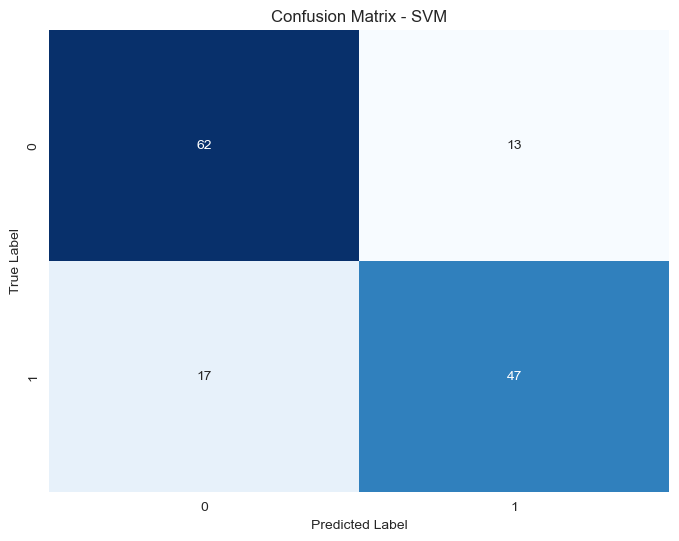

In [59]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [62]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nXGBoost Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



XGBoost Accuracy: 0.8129

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        75
           1       0.84      0.73      0.78        64

    accuracy                           0.81       139
   macro avg       0.82      0.81      0.81       139
weighted avg       0.82      0.81      0.81       139



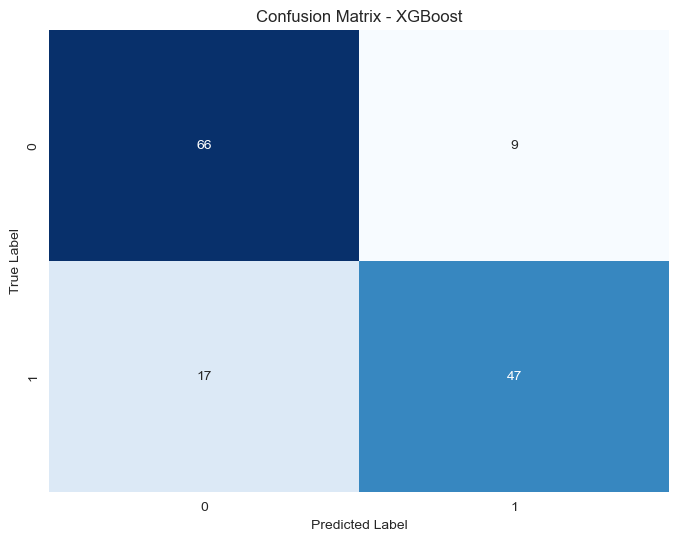

In [63]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV



# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8880917280917281


# 3.3 Model Fine Tunning

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import time

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [66]:
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}


In [67]:
grid_search_results = {}

for model_name, model in models.items():
    print(f"\n{'='*20} Grid Search: {model_name} {'='*20}")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    end_time = time.time()
    execution_time = end_time - start_time

    # Save the best model
    best_model = grid_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Grid Search for {model_name} completed in {execution_time:.2f} seconds")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 50)


==================== Grid Search: Logistic Regression ====================
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Grid Search for Logistic Regression completed in 0.25 seconds
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8357
Test accuracy: 0.8489
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        75
           1       0.86      0.80      0.83        64

    accuracy                           0.85       139
   macro avg       0.85      0.85      0.85       139
weighted avg       0.85      0.85      0.85       139

Confusion Matrix:
[[67  8]
 [13 51]]
--------------------------------------------------

==================== Grid Search: Random Forest ====================
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Grid Search for Random Forest completed in 39.38 seconds
Best parameters: {'max_depth': 5, 'min_samples_l

In [68]:
# Store results
grid_search_results[model_name] = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'cv_accuracy': grid_search.best_score_,
        'test_accuracy': test_accuracy,
        'report': report,
        'confusion_matrix': cm
    }

In [69]:
#Compare Grid Search results
print("\n" + "="*50)
print("GRID SEARCH RESULTS SUMMARY")
print("="*50)
grid_df = pd.DataFrame({
    'Model': list(grid_search_results.keys()),
    'CV Accuracy': [results['cv_accuracy'] for results in grid_search_results.values()],
    'Test Accuracy': [results['test_accuracy'] for results in grid_search_results.values()]
})
print(grid_df.sort_values('CV Accuracy', ascending=False))

# Find the best model from Grid Search
best_model_name = grid_df.sort_values('CV Accuracy', ascending=False).iloc[0]['Model']
best_model = grid_search_results[best_model_name]['best_model']
best_cv_accuracy = grid_search_results[best_model_name]['cv_accuracy']
best_test_accuracy = grid_search_results[best_model_name]['test_accuracy']

print("\n" + "="*50)
print(f"BEST MODEL FROM GRID SEARCH: {best_model_name}")
print(f"Best CV Accuracy: {best_cv_accuracy:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Parameters: {grid_search_results[best_model_name]['best_params']}")
print("="*50)

# Save the best model from Grid Search
model_filename = f'heart_disease_grid_search_best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nBest model from Grid Search saved as: {model_filename}")


GRID SEARCH RESULTS SUMMARY
               Model  CV Accuracy  Test Accuracy
0  Gradient Boosting     0.889861       0.848921

BEST MODEL FROM GRID SEARCH: Gradient Boosting
Best CV Accuracy: 0.8899
Best Test Accuracy: 0.8489
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Best model from Grid Search saved as: heart_disease_grid_search_best_model.pkl


In [70]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [71]:
random_search_param_distributions = {
    'Logistic Regression': {
        'C': np.logspace(-3, 3, 20),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': np.arange(50, 500, 50),
        'max_depth': [None] + list(np.arange(3, 20, 2)),
        'min_samples_split': np.arange(2, 20, 2),
        'min_samples_leaf': np.arange(1, 10, 1)
    },
    'SVM': {
        'C': np.logspace(-3, 3, 10),
        'gamma': np.logspace(-3, 1, 10),
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    },
    'Gradient Boosting': {
        'n_estimators': np.arange(50, 500, 50),
        'learning_rate': np.logspace(-3, 0, 10),
        'max_depth': np.arange(3, 10, 1),
        'subsample': np.linspace(0.5, 1.0, 10)
    }
}

In [72]:
from sklearn.model_selection import  RandomizedSearchCV
random_search_results = {}

for model_name, model in models.items():
    print(f"\n{'='*20} Random Search: {model_name} {'='*20}")
    start_time = time.time()

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=random_search_param_distributions[model_name],
        n_iter=20,  # Number of parameter settings sampled
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    random_search.fit(X_train_scaled, y_train)

    end_time = time.time()
    execution_time = end_time - start_time

    # Save the best model
    best_model = random_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Random Search for {model_name} completed in {execution_time:.2f} seconds")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 50)


==================== Random Search: Logistic Regression ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Search for Logistic Regression completed in 0.22 seconds
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1623776739188721}
Best cross-validation score: 0.8321
Test accuracy: 0.8273
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        75
           1       0.84      0.77      0.80        64

    accuracy                           0.83       139
   macro avg       0.83      0.82      0.82       139
weighted avg       0.83      0.83      0.83       139

Confusion Matrix:
[[66  9]
 [15 49]]
--------------------------------------------------

==================== Random Search: Random Forest ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Search for Random Forest completed in 10.72 seconds
Best parameters: {'n_est

In [73]:
# Store results
random_search_results[model_name] = {
        'best_model': best_model,
        'best_params': random_search.best_params_,
        'cv_accuracy': random_search.best_score_,
        'test_accuracy': test_accuracy,
        'report': report,
        'confusion_matrix': cm
    }


In [74]:
#Compare Random Search results
print("\n" + "="*50)
print("RANDOM SEARCH RESULTS SUMMARY")
print("="*50)
random_df = pd.DataFrame({
    'Model': list(random_search_results.keys()),
    'CV Accuracy': [results['cv_accuracy'] for results in random_search_results.values()],
    'Test Accuracy': [results['test_accuracy'] for results in random_search_results.values()]
})
print(random_df.sort_values('CV Accuracy', ascending=False))


RANDOM SEARCH RESULTS SUMMARY
               Model  CV Accuracy  Test Accuracy
0  Gradient Boosting     0.880885       0.848921


In [75]:
#Find the best model from Random Search
best_model_name = random_df.sort_values('CV Accuracy', ascending=False).iloc[0]['Model']
best_model = random_search_results[best_model_name]['best_model']
best_cv_accuracy = random_search_results[best_model_name]['cv_accuracy']
best_test_accuracy = random_search_results[best_model_name]['test_accuracy']

print("\n" + "="*50)
print(f"BEST MODEL FROM RANDOM SEARCH: {best_model_name}")
print(f"Best CV Accuracy: {best_cv_accuracy:.4f}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print(f"Best Parameters: {random_search_results[best_model_name]['best_params']}")
print("="*50)

# Save the best model from Random Search
model_filename = f'heart_disease_random_search_best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nBest model from Random Search saved as: {model_filename}")


BEST MODEL FROM RANDOM SEARCH: Gradient Boosting
Best CV Accuracy: 0.8809
Best Test Accuracy: 0.8489
Best Parameters: {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.0021544346900318843}

Best model from Random Search saved as: heart_disease_random_search_best_model.pkl


In [77]:
# Import necessary libraries
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import datetime
best_model.fit(X, y)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # For binary classification

# Calculate performance metrics
performance = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_pred_proba)
}

# Save the model
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"final_model_{timestamp}.joblib"
joblib.dump(best_model, model_filename)

# Save performance metrics
pd.DataFrame([performance]).to_csv(f"model_performance_{timestamp}.csv", index=False)

print(f"Model saved as {model_filename}")
print("Performance metrics:")
for metric, value in performance.items():
    print(f"  {metric}: {value:.4f}")

Model saved as final_model_20250512_031519.joblib
Performance metrics:
  accuracy: 0.9353
  precision: 0.9365
  recall: 0.9219
  f1: 0.9291
  roc_auc: 0.9879
